<a href="https://colab.research.google.com/github/asimds/26DECOPFAIL/blob/main/7jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [351]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [352]:
import pandas as pd
df1= pd.read_pickle('/content/drive/MyDrive/msg_processed_final')

In [353]:
df1.head()

,user_id,CIBIL_OVERDUE_Delivered,CIBIL_OVERDUE_Operator_Failed,ISSUE_RESOLVED_Delivered,ISSUE_RESOLVED_Operator_Failed,OTP_Delivered,OTP_Operator_Failed,OVERDUE_SETTLEMENT_Delivered,OVERDUE_SETTLEMENT_Operator_Failed,PAYMENT_LINK_Delivered,PAYMENT_LINK_Operator_Failed,REFERENCE_Delivered,REFERENCE_Operator_Failed,SETTLEMENT_Delivered,SETTLEMENT_Operator_Failed,SUCESSFULLY_Delivered_msgs,Undelivered_msgs
0,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025
1,170378,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0
2,170473,0,0,0,0,0,0,0,0,0,0,1898,1375,0,0,1898,1375
3,170951,8,0,0,0,6,0,0,0,9,0,3668,7367,0,0,3691,7367
4,178130,0,0,0,0,0,0,0,0,0,0,25,3097,0,0,25,3097


In [354]:
df2= pd.read_pickle('/content/drive/MyDrive/payments_to_merge_with_pivot_df_working')

In [355]:
df2.head()

,user_id,amount,entity_type,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,billing_to_settled_date_diff
0,31175,-11199,late_fee,0,-209,0.0,-1,16.0,15.0
1,56992,-2349,late_fee,0,-66,0.0,-1,24.0,23.0
2,82264,-4380,late_fee,0,-77,0.0,-1,15.0,14.0
3,37799,-461,late_fee,0,-47,0.0,-1,86.0,85.0
4,129112,-2714,late_fee,0,-247,0.0,-1,78.0,77.0


In [356]:
df_w= pd.merge(df1, df2, on='user_id')

In [357]:
df_w.head()

,user_id,CIBIL_OVERDUE_Delivered,CIBIL_OVERDUE_Operator_Failed,ISSUE_RESOLVED_Delivered,ISSUE_RESOLVED_Operator_Failed,OTP_Delivered,OTP_Operator_Failed,OVERDUE_SETTLEMENT_Delivered,OVERDUE_SETTLEMENT_Operator_Failed,PAYMENT_LINK_Delivered,PAYMENT_LINK_Operator_Failed,REFERENCE_Delivered,REFERENCE_Operator_Failed,SETTLEMENT_Delivered,SETTLEMENT_Operator_Failed,SUCESSFULLY_Delivered_msgs,Undelivered_msgs,amount,entity_type,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,billing_to_settled_date_diff
0,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-1000,utility,0,0,0.0,18,-18.0,0.0
1,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-90000,qr,0,0,0.0,18,-18.0,0.0
2,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,91000,bill,0,0,NaN,0,NaN,NaN
3,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-1000,utility,0,0,0.0,16,-18.0,-1.0
4,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,1000,bill,0,0,NaN,0,NaN,NaN


In [358]:
df_w.shape

(5469, 25)

In [359]:
df_w.user_id.value_counts()

455467    68
455979    63
446411    63
440694    57
326403    48
          ..
318843     1
444418     1
330824     1
449610     1
446072     1
Name: user_id, Length: 427, dtype: int64

In [360]:
#df1['billing_to_due_date_diff'] = (df1['due_date'] - df1['billable_at']).dt.days
#df1['due_to_settled_date_diff'] = (df1['settled_at'] - df1['due_date']).dt.days
#df1['billing_to_settled_date_diff'] = (df1['settled_at'] - df1['billable_at']).dt.days

In [361]:
df_w.tail()

,user_id,CIBIL_OVERDUE_Delivered,CIBIL_OVERDUE_Operator_Failed,ISSUE_RESOLVED_Delivered,ISSUE_RESOLVED_Operator_Failed,OTP_Delivered,OTP_Operator_Failed,OVERDUE_SETTLEMENT_Delivered,OVERDUE_SETTLEMENT_Operator_Failed,PAYMENT_LINK_Delivered,PAYMENT_LINK_Operator_Failed,REFERENCE_Delivered,REFERENCE_Operator_Failed,SETTLEMENT_Delivered,SETTLEMENT_Operator_Failed,SUCESSFULLY_Delivered_msgs,Undelivered_msgs,amount,entity_type,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,billing_to_settled_date_diff
5464,562508,0,0,0,0,0,0,0,0,0,0,260,9,0,0,260,9,-20000,qr,0,0,0.0,44,-18.0,27.0
5465,562508,0,0,0,0,0,0,0,0,0,0,260,9,0,0,260,9,-590,convenience_fee,0,0,0.0,44,-18.0,27.0
5466,562508,0,0,0,0,0,0,0,0,0,0,260,9,0,0,260,9,-20000,qr,0,0,0.0,44,-18.0,27.0
5467,562508,0,0,0,0,0,0,0,0,0,0,260,9,0,0,260,9,-7000,qr,0,0,0.0,44,-18.0,27.0
5468,562508,0,0,0,0,0,0,0,0,0,0,260,9,0,0,260,9,-590,convenience_fee,0,0,0.0,44,-18.0,27.0


In [362]:
df_w.sample(frac=0.4)

,user_id,CIBIL_OVERDUE_Delivered,CIBIL_OVERDUE_Operator_Failed,ISSUE_RESOLVED_Delivered,ISSUE_RESOLVED_Operator_Failed,OTP_Delivered,OTP_Operator_Failed,OVERDUE_SETTLEMENT_Delivered,OVERDUE_SETTLEMENT_Operator_Failed,PAYMENT_LINK_Delivered,PAYMENT_LINK_Operator_Failed,REFERENCE_Delivered,REFERENCE_Operator_Failed,SETTLEMENT_Delivered,SETTLEMENT_Operator_Failed,SUCESSFULLY_Delivered_msgs,Undelivered_msgs,amount,entity_type,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,billing_to_settled_date_diff
2656,447176,0,0,0,0,8,0,0,0,4,0,387,14,0,0,399,14,-2000,qr,0,-110,0.0,29,16.0,46.0
2708,447277,0,0,0,0,0,0,0,0,0,0,111,8,0,0,111,8,-100,qr,0,-6,0.0,39,9.0,49.0
2411,446411,0,0,0,0,49,0,0,0,4,0,140,834,0,0,193,834,-590,convenience_fee,0,0,0.0,19,-20.0,0.0
1309,443070,0,0,0,0,10,0,0,0,0,0,62,6399,0,0,72,6399,-40000,qr,0,0,0.0,29,-28.0,2.0
2113,445802,10,0,0,0,72,0,0,0,26,0,663,2392,0,0,771,2392,-2290,convenience_fee,0,0,0.0,28,-26.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,445949,67,3,0,0,5,0,0,0,63,1,7985,8999,0,0,8120,9003,6000,bill,0,0,NaN,0,NaN,NaN
3623,449705,0,0,0,0,9,0,0,0,6,0,824,27,0,0,839,27,-19900,utility,0,-984,-19655.0,40,NaN,NaN
1501,443849,8,0,0,0,21,0,0,0,14,0,244,63,0,0,287,63,45966,sell_gold,0,0,NaN,0,NaN,NaN
4647,452889,0,0,0,0,0,0,0,0,0,0,39,0,0,0,39,0,-8000,emi,0,0,0.0,45,-56.0,-10.0


In [363]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')

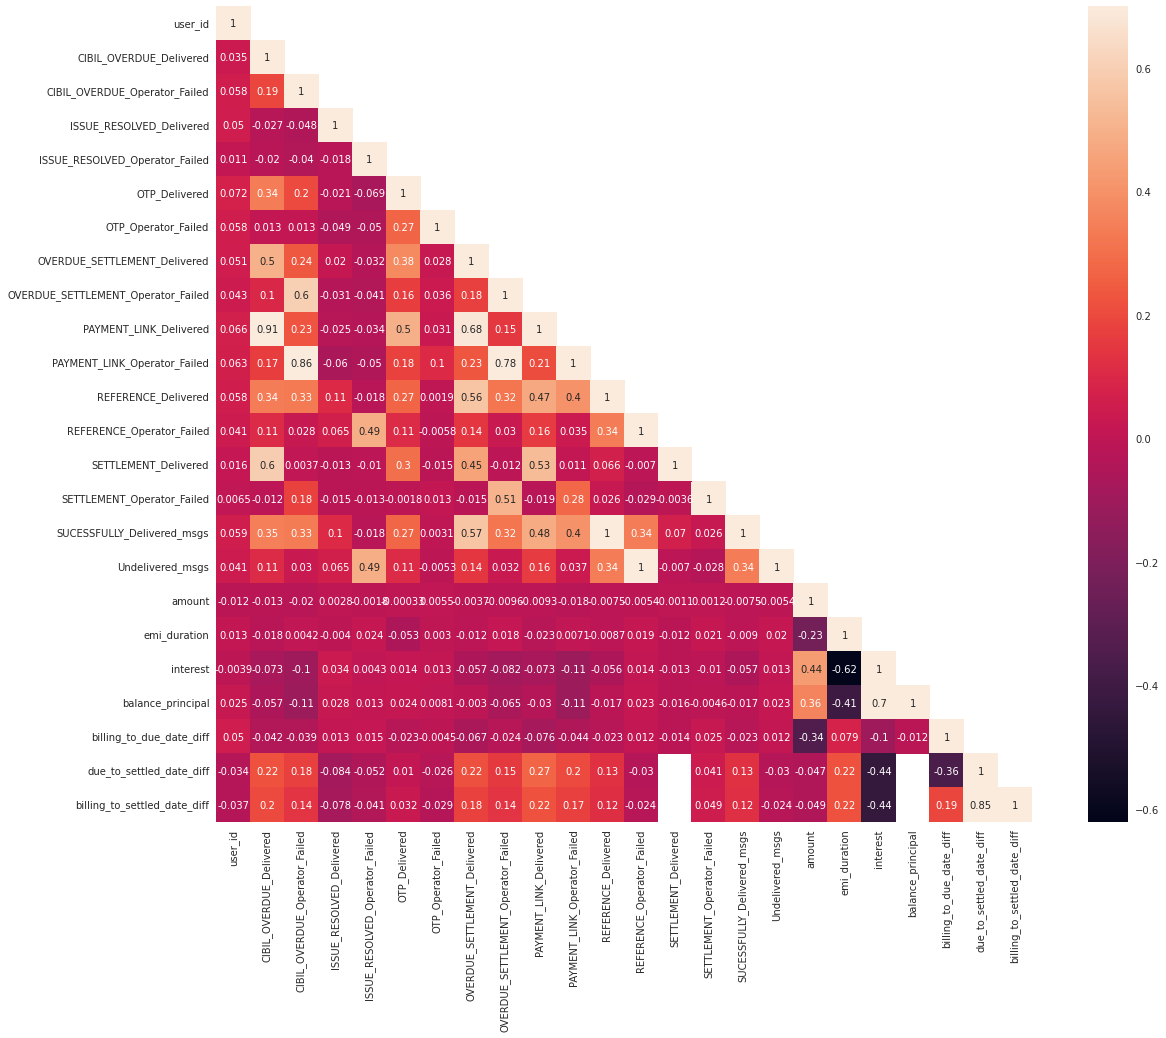

In [364]:

correlation_map = df_w[df_w.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,15)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

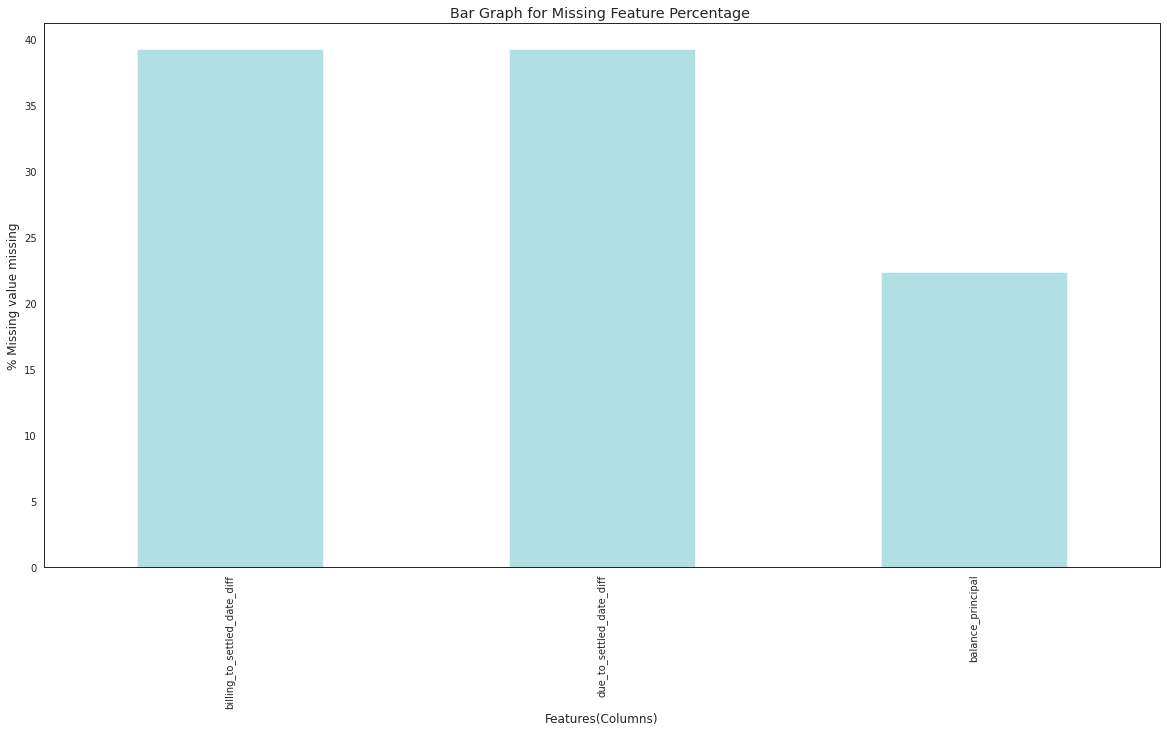

In [365]:
# Plot all the Missing Values in Decending Order
%matplotlib inline
missing_values = ((df_w.isna().sum())/df_w.shape[0])*100

missing_values.sort_values(ascending=False,inplace = True)
missing_values = missing_values.drop(missing_values[missing_values == 0].index)

color=['powderblue']

plt.figure(figsize=(20,10))
missing_values.plot.bar(color = color)
plt.xlabel('Features(Columns)')
plt.ylabel('% Missing value missing')
plt.title('Bar Graph for Missing Feature Percentage ')

plt.show()

In [366]:
df_w.shape

(5469, 25)

In [367]:
df_w.balance_principal.value_counts()

 0.0        3322
-590.0        44
-10000.0      33
-18000.0      30
-9000.0       30
            ... 
-1765.0        1
-4863.0        1
-51000.0       1
-10200.0       1
-140.0         1
Name: balance_principal, Length: 351, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


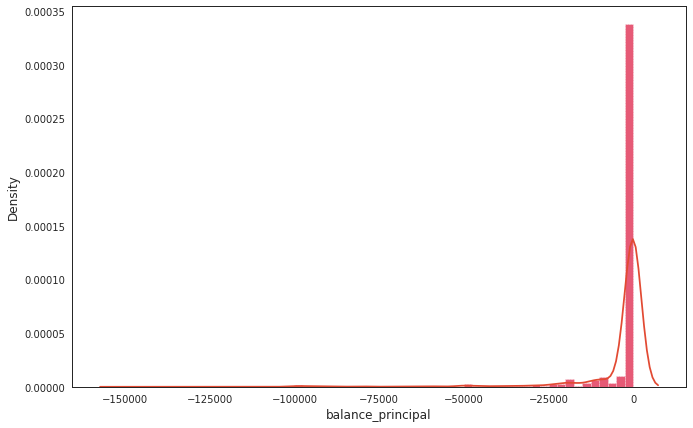

In [368]:
#price distribution in our dataset
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(df_w["balance_principal"],
                hist_kws = {'color':'#DC143C',
                     'linestyle':'--', 'alpha':0.7}, bins=60);

In [369]:
df_w.to_pickle('/content/drive/MyDrive/msgs+payment')

The above dataframe is a result of merging filetered payments and msgs log considering that we have data only from 5 june to 26nov. So from filtered payments data I've selected those the same time line from 5 June to 1 Dec (billable_at). 
Because we have last 6 months of msgs data of a user so I selected to maintain a congruency. It could also be done considering the last 150 days from 5 June 2021.

We can now conduct our further analysis based on these 427 users. 

In [370]:
df_w.columns

Index(['user_id', 'CIBIL_OVERDUE_Delivered', 'CIBIL_OVERDUE_Operator_Failed',
       'ISSUE_RESOLVED_Delivered', 'ISSUE_RESOLVED_Operator_Failed',
       'OTP_Delivered', 'OTP_Operator_Failed', 'OVERDUE_SETTLEMENT_Delivered',
       'OVERDUE_SETTLEMENT_Operator_Failed', 'PAYMENT_LINK_Delivered',
       'PAYMENT_LINK_Operator_Failed', 'REFERENCE_Delivered',
       'REFERENCE_Operator_Failed', 'SETTLEMENT_Delivered',
       'SETTLEMENT_Operator_Failed', 'SUCESSFULLY_Delivered_msgs',
       'Undelivered_msgs', 'amount', 'entity_type', 'emi_duration', 'interest',
       'balance_principal', 'billing_to_due_date_diff',
       'due_to_settled_date_diff', 'billing_to_settled_date_diff'],
      dtype='object')

In [371]:
df_w.describe()

,user_id,CIBIL_OVERDUE_Delivered,CIBIL_OVERDUE_Operator_Failed,ISSUE_RESOLVED_Delivered,ISSUE_RESOLVED_Operator_Failed,OTP_Delivered,OTP_Operator_Failed,OVERDUE_SETTLEMENT_Delivered,OVERDUE_SETTLEMENT_Operator_Failed,PAYMENT_LINK_Delivered,PAYMENT_LINK_Operator_Failed,REFERENCE_Delivered,REFERENCE_Operator_Failed,SETTLEMENT_Delivered,SETTLEMENT_Operator_Failed,SUCESSFULLY_Delivered_msgs,Undelivered_msgs,amount,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,billing_to_settled_date_diff
count,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000,4246.000000,5469.000000,3322.000000,3322.000000
mean,440380.974035,2.427318,0.795941,0.051015,0.184494,9.407570,0.292741,0.214482,0.110806,4.389834,1.211190,1456.611446,2261.141525,0.002926,0.004388,1473.104590,2263.741086,-6042.767051,0.209545,-823.374657,-3759.082666,21.469739,3.134557,32.149007
std,36737.751783,8.150652,3.004942,0.220878,0.975453,14.672707,1.043873,0.930014,0.507956,10.235280,3.890018,3531.238941,3221.112682,0.054014,0.066105,3543.466984,3221.825584,40295.411367,0.919179,2276.705311,13012.606355,19.909581,33.654598,31.866664
min,132894.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-373000.000000,0.000000,-23377.000000,-150000.000000,-1.000000,-139.000000,-124.000000
25%,443282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,32.000000,0.000000,0.000000,65.000000,35.000000,-15000.000000,0.000000,-362.000000,0.000000,0.000000,-17.000000,9.000000
50%,447315.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000,904.000000,0.000000,0.000000,468.000000,904.000000,-3000.000000,0.000000,0.000000,0.000000,20.000000,-3.000000,27.000000
75%,450709.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2054.000000,3135.000000,0.000000,0.000000,2085.000000,3135.000000,-590.000000,0.000000,0.000000,0.000000,35.000000,22.000000,51.000000
max,562508.000000,92.000000,38.000000,2.000000,7.000000,90.000000,7.000000,13.000000,4.000000,105.000000,31.000000,71119.000000,18729.000000,1.000000,1.000000,71311.000000,18769.000000,235000.000000,6.000000,0.000000,0.000000,115.000000,153.000000,173.000000


***From above we can see that on an average we see 1500 are for successfully delivered reference type messages.***

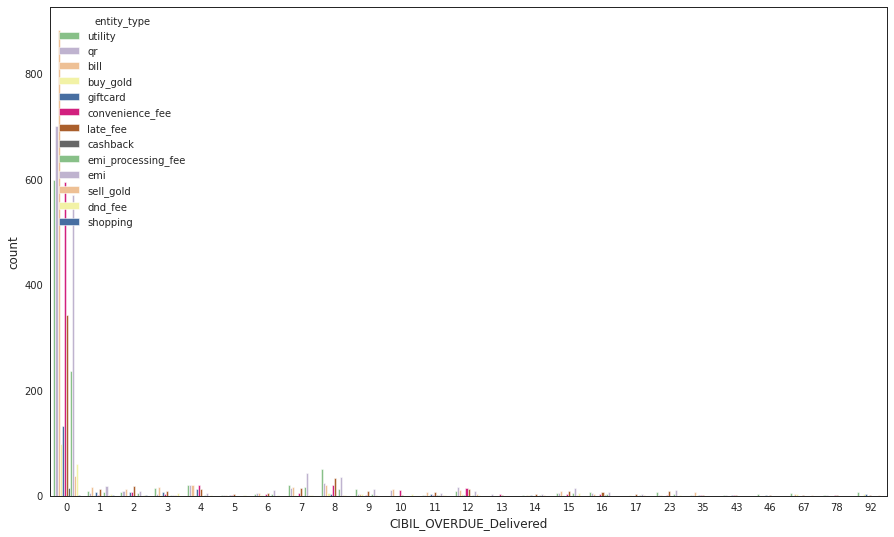

In [372]:
plt.subplots(figsize=(15,9))
sns.countplot(x='CIBIL_OVERDUE_Delivered',hue='entity_type',data=df_w, palette='Accent');

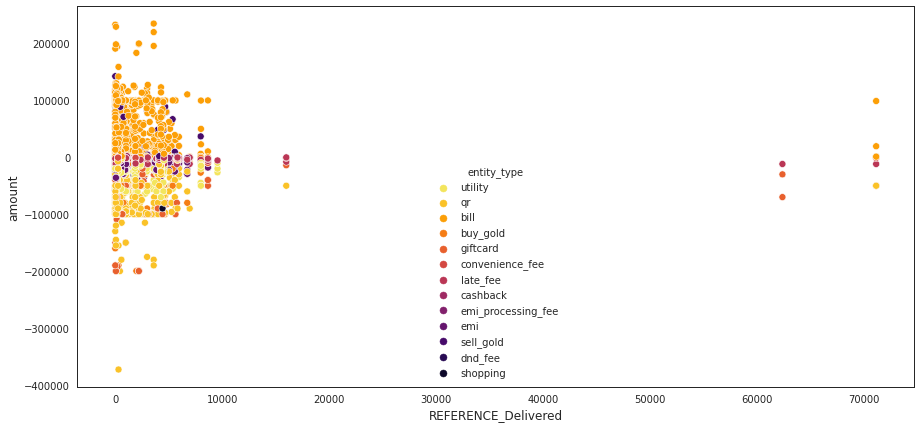

In [373]:
#plotting price and life_sq with respect to investment type from original dataframe
plt.subplots(figsize=(15,7))
sns.scatterplot(x="REFERENCE_Delivered", y="amount", hue="entity_type", data=df_w, palette='inferno_r');

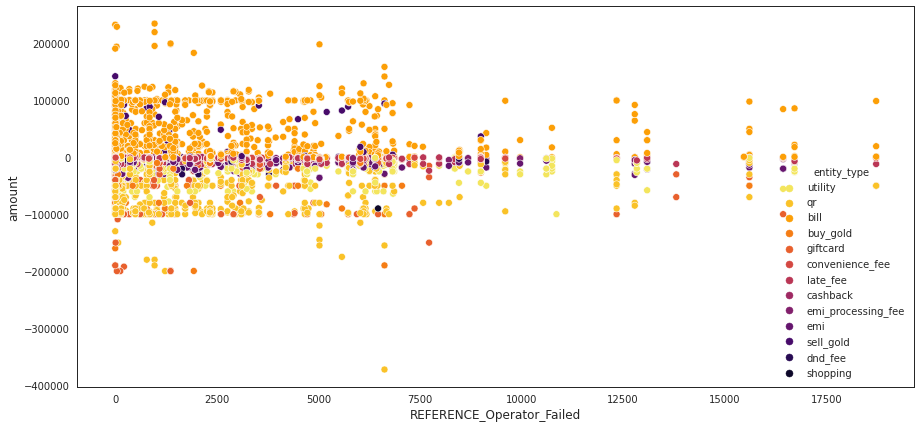

In [374]:
#plotting price and life_sq with respect to investment type from original dataframe
plt.subplots(figsize=(15,7))
sns.scatterplot(x="REFERENCE_Operator_Failed", y="amount", hue="entity_type", data=df_w, palette='inferno_r');

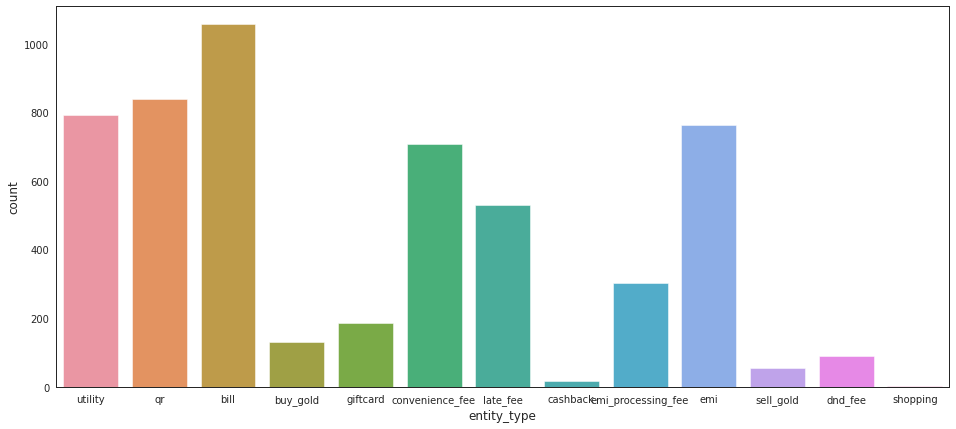

In [375]:
plt.subplots(figsize=(16,7))
sns.countplot(x='entity_type',data=df_w);


***Selecting those users that need more than average Reference delivered messages.***

In [376]:
#extracting those where we have reference delivered count >1500 (for 10K only 3 USERs were there,for 5K 21 users)
most_ref=df_w.loc[df_w['REFERENCE_Delivered'] >= 1500]

In [377]:
most_ref.user_id.nunique()

138

In [378]:
less_ref=df_w.loc[df_w['REFERENCE_Delivered'] < 1500]

In [379]:
less_ref.user_id.nunique()

289

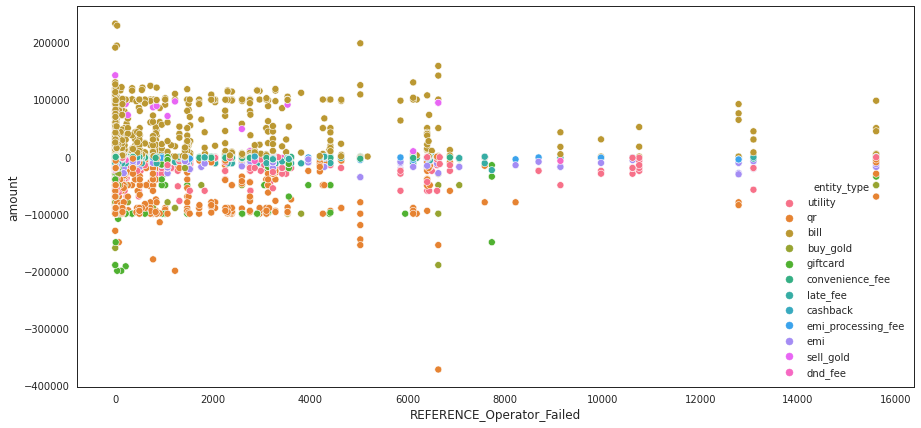

In [380]:
#plotting price and life_sq with respect to investment type from original dataframe
plt.subplots(figsize=(15,7))
sns.scatterplot(x="REFERENCE_Operator_Failed", y="amount", hue="entity_type", data=less_ref);

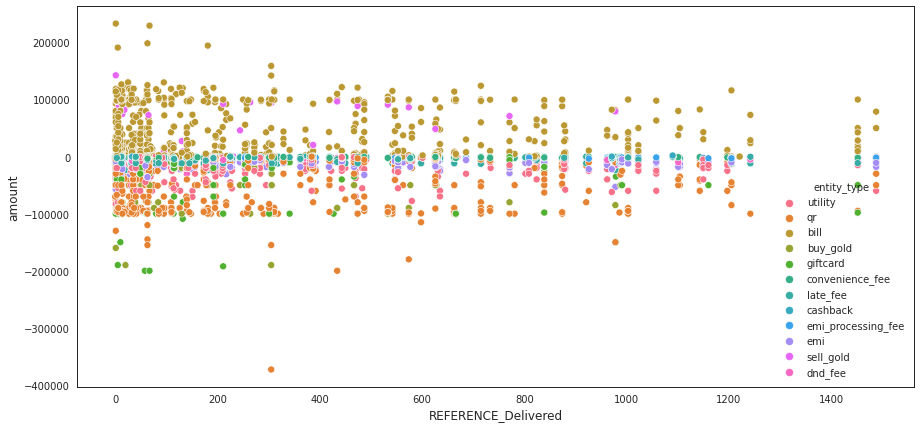

In [381]:
#plotting price and life_sq with respect to investment type from original dataframe
plt.subplots(figsize=(15,7))
sns.scatterplot(x="REFERENCE_Delivered", y="amount", hue="entity_type", data=less_ref);

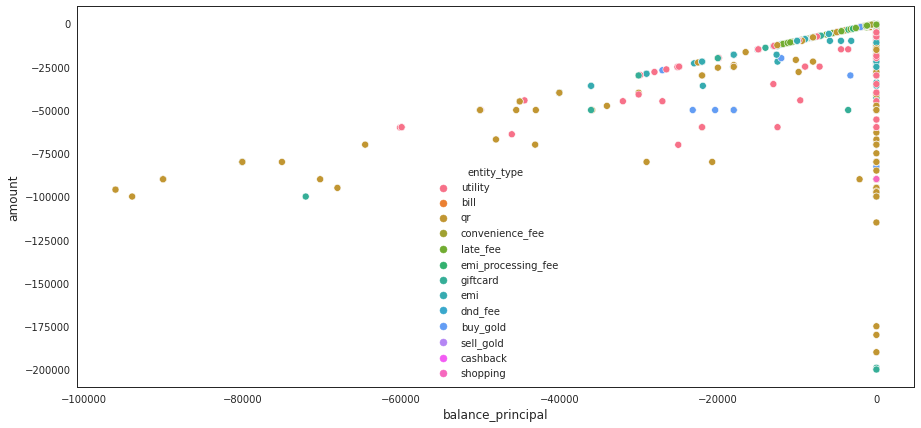

In [382]:
plt.subplots(figsize=(15,7))
sns.scatterplot(x="balance_principal", y="amount", hue="entity_type", data=most_ref);

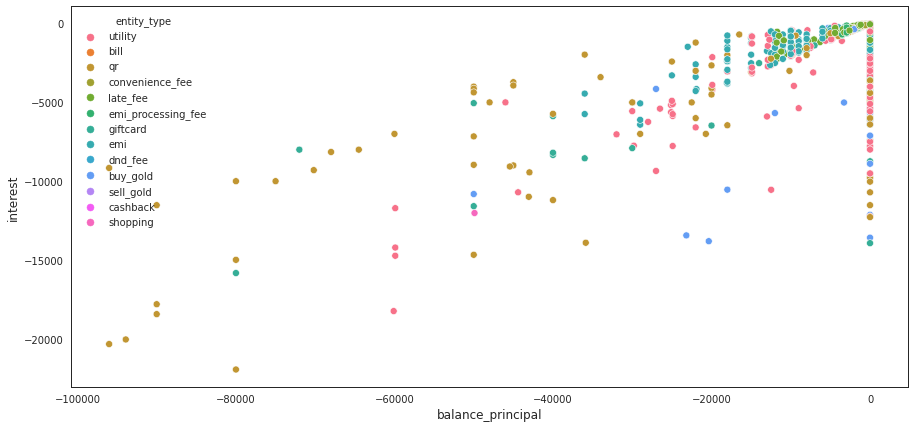

In [383]:
plt.subplots(figsize=(15,7))
sns.scatterplot(x="balance_principal", y="interest", hue="entity_type", data=most_ref);

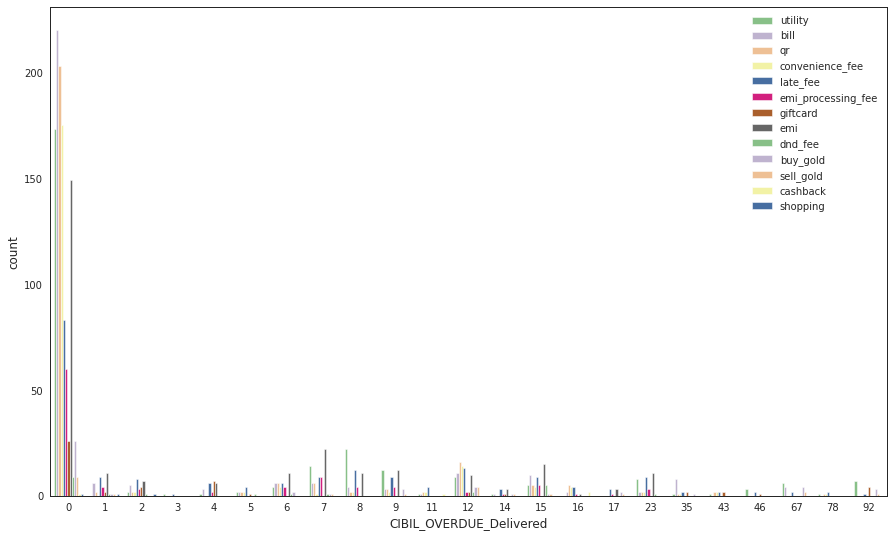

In [384]:
plt.subplots(figsize=(15,9))
sns.countplot(x='CIBIL_OVERDUE_Delivered',hue='entity_type',data=most_ref, palette='Accent')
plt.legend(loc='upper right');

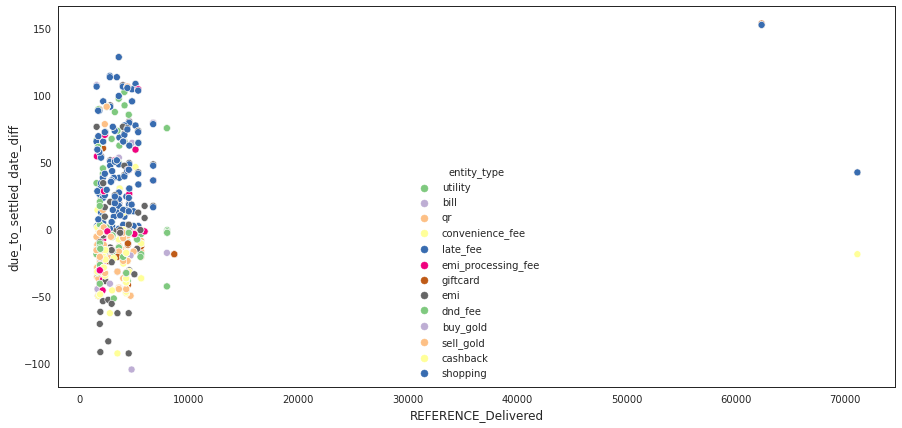

In [385]:
plt.subplots(figsize=(15,7))
sns.scatterplot(x="REFERENCE_Delivered", y="due_to_settled_date_diff", hue="entity_type", data=most_ref,palette='Accent');

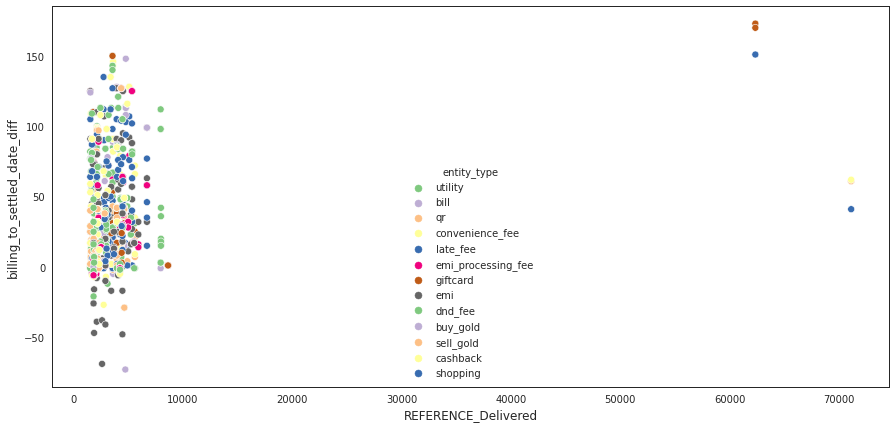

In [386]:
plt.subplots(figsize=(15,7))
sns.scatterplot(x="REFERENCE_Delivered", y="billing_to_settled_date_diff", hue="entity_type", data=most_ref,palette='Accent');

In [387]:
df_w.drop('billing_to_settled_date_diff', axis=1, inplace=True)

In [388]:
df_w.to_pickle('/content/drive/MyDrive/data_to_cluster')

In [389]:
df_w.head()

,user_id,CIBIL_OVERDUE_Delivered,CIBIL_OVERDUE_Operator_Failed,ISSUE_RESOLVED_Delivered,ISSUE_RESOLVED_Operator_Failed,OTP_Delivered,OTP_Operator_Failed,OVERDUE_SETTLEMENT_Delivered,OVERDUE_SETTLEMENT_Operator_Failed,PAYMENT_LINK_Delivered,PAYMENT_LINK_Operator_Failed,REFERENCE_Delivered,REFERENCE_Operator_Failed,SETTLEMENT_Delivered,SETTLEMENT_Operator_Failed,SUCESSFULLY_Delivered_msgs,Undelivered_msgs,amount,entity_type,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff
0,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-1000,utility,0,0,0.0,18,-18.0
1,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-90000,qr,0,0,0.0,18,-18.0
2,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,91000,bill,0,0,NaN,0,NaN
3,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-1000,utility,0,0,0.0,16,-18.0
4,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,1000,bill,0,0,NaN,0,NaN


In [390]:
df_w.sample(frac=0.004)

,user_id,CIBIL_OVERDUE_Delivered,CIBIL_OVERDUE_Operator_Failed,ISSUE_RESOLVED_Delivered,ISSUE_RESOLVED_Operator_Failed,OTP_Delivered,OTP_Operator_Failed,OVERDUE_SETTLEMENT_Delivered,OVERDUE_SETTLEMENT_Operator_Failed,PAYMENT_LINK_Delivered,PAYMENT_LINK_Operator_Failed,REFERENCE_Delivered,REFERENCE_Operator_Failed,SETTLEMENT_Delivered,SETTLEMENT_Operator_Failed,SUCESSFULLY_Delivered_msgs,Undelivered_msgs,amount,entity_type,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff
1587,444559,15,0,0,1,7,0,0,0,23,1,2802,1293,0,0,2847,1295,-11000,emi,0,-697,0.0,14,92.0
4299,451260,7,1,0,0,18,0,0,0,9,0,12,174,0,0,46,175,-2950,emi_processing_fee,0,0,0.0,43,-20.0
1205,442608,0,0,0,0,51,0,0,0,0,0,5630,12340,0,0,5681,12340,-100000,giftcard,0,0,0.0,37,-13.0
4552,452316,0,0,0,0,5,0,0,0,7,1,173,3286,0,0,185,3287,-40000,qr,0,-1816,0.0,19,18.0
1874,445439,0,0,0,0,5,0,0,0,0,0,126,558,0,0,131,558,-2124,convenience_fee,0,0,0.0,105,-30.0
1905,445568,4,12,0,0,24,0,0,4,4,31,8660,1814,0,0,8692,1861,-40000,giftcard,0,-8334,-40000.0,17,NaN
3049,447905,0,0,0,0,3,0,0,0,0,0,47,2773,0,0,50,2773,-1470,emi_processing_fee,0,-47,0.0,18,7.0
98,325171,0,0,0,0,0,0,0,0,0,0,13,0,0,0,13,0,-1100,utility,0,-61,0.0,44,1.0
3359,448743,0,0,0,0,3,0,0,0,0,0,109,448,0,0,112,448,9757,bill,0,0,NaN,0,NaN
2811,447565,0,0,0,0,0,0,0,0,0,0,2106,1206,0,0,2106,1206,-7900,utility,0,0,0.0,22,-21.0


In [391]:
df_w.isna().sum().sort_values(ascending=False)


due_to_settled_date_diff              2147
balance_principal                     1223
PAYMENT_LINK_Operator_Failed             0
CIBIL_OVERDUE_Delivered                  0
CIBIL_OVERDUE_Operator_Failed            0
ISSUE_RESOLVED_Delivered                 0
ISSUE_RESOLVED_Operator_Failed           0
OTP_Delivered                            0
OTP_Operator_Failed                      0
OVERDUE_SETTLEMENT_Delivered             0
OVERDUE_SETTLEMENT_Operator_Failed       0
PAYMENT_LINK_Delivered                   0
REFERENCE_Delivered                      0
billing_to_due_date_diff                 0
REFERENCE_Operator_Failed                0
SETTLEMENT_Delivered                     0
SETTLEMENT_Operator_Failed               0
SUCESSFULLY_Delivered_msgs               0
Undelivered_msgs                         0
amount                                   0
entity_type                              0
emi_duration                             0
interest                                 0
user_id    

In [392]:
df_w.balance_principal = df_w.groupby('user_id')['balance_principal'].apply(lambda x: x.fillna(x.mean()))
df_w.balance_principal = df_w.balance_principal.fillna(df_w.balance_principal.mean())

In [393]:
df_w.due_to_settled_date_diff = df_w.groupby('user_id')['due_to_settled_date_diff'].apply(lambda x: x.fillna(x.mean()))
df_w.due_to_settled_date_diff = df_w.due_to_settled_date_diff.fillna(df_w.due_to_settled_date_diff.mean())

In [394]:
df_w.isnull().values.any()

False

In [395]:
df_w.head()

,user_id,CIBIL_OVERDUE_Delivered,CIBIL_OVERDUE_Operator_Failed,ISSUE_RESOLVED_Delivered,ISSUE_RESOLVED_Operator_Failed,OTP_Delivered,OTP_Operator_Failed,OVERDUE_SETTLEMENT_Delivered,OVERDUE_SETTLEMENT_Operator_Failed,PAYMENT_LINK_Delivered,PAYMENT_LINK_Operator_Failed,REFERENCE_Delivered,REFERENCE_Operator_Failed,SETTLEMENT_Delivered,SETTLEMENT_Operator_Failed,SUCESSFULLY_Delivered_msgs,Undelivered_msgs,amount,entity_type,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff
0,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-1000,utility,0,0,0.000000,18,-18.000000
1,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-90000,qr,0,0,0.000000,18,-18.000000
2,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,91000,bill,0,0,-3571.428571,0,-6.185185
3,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-1000,utility,0,0,0.000000,16,-18.000000
4,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,1000,bill,0,0,-3571.428571,0,-6.185185


In [396]:
df_w.user_id.nunique()

427

In [397]:
df_w.columns

Index(['user_id', 'CIBIL_OVERDUE_Delivered', 'CIBIL_OVERDUE_Operator_Failed',
       'ISSUE_RESOLVED_Delivered', 'ISSUE_RESOLVED_Operator_Failed',
       'OTP_Delivered', 'OTP_Operator_Failed', 'OVERDUE_SETTLEMENT_Delivered',
       'OVERDUE_SETTLEMENT_Operator_Failed', 'PAYMENT_LINK_Delivered',
       'PAYMENT_LINK_Operator_Failed', 'REFERENCE_Delivered',
       'REFERENCE_Operator_Failed', 'SETTLEMENT_Delivered',
       'SETTLEMENT_Operator_Failed', 'SUCESSFULLY_Delivered_msgs',
       'Undelivered_msgs', 'amount', 'entity_type', 'emi_duration', 'interest',
       'balance_principal', 'billing_to_due_date_diff',
       'due_to_settled_date_diff'],
      dtype='object')

In [398]:
#We use pandas's 'get_dummies()' method
df_w1 = pd.get_dummies(df_w)

In [399]:
df_w1.columns

Index(['user_id', 'CIBIL_OVERDUE_Delivered', 'CIBIL_OVERDUE_Operator_Failed',
       'ISSUE_RESOLVED_Delivered', 'ISSUE_RESOLVED_Operator_Failed',
       'OTP_Delivered', 'OTP_Operator_Failed', 'OVERDUE_SETTLEMENT_Delivered',
       'OVERDUE_SETTLEMENT_Operator_Failed', 'PAYMENT_LINK_Delivered',
       'PAYMENT_LINK_Operator_Failed', 'REFERENCE_Delivered',
       'REFERENCE_Operator_Failed', 'SETTLEMENT_Delivered',
       'SETTLEMENT_Operator_Failed', 'SUCESSFULLY_Delivered_msgs',
       'Undelivered_msgs', 'amount', 'emi_duration', 'interest',
       'balance_principal', 'billing_to_due_date_diff',
       'due_to_settled_date_diff', 'entity_type_bill', 'entity_type_buy_gold',
       'entity_type_cashback', 'entity_type_convenience_fee',
       'entity_type_dnd_fee', 'entity_type_emi',
       'entity_type_emi_processing_fee', 'entity_type_giftcard',
       'entity_type_late_fee', 'entity_type_qr', 'entity_type_sell_gold',
       'entity_type_shopping', 'entity_type_utility'],
      dty

In [400]:
df1=df_w1[['user_id', 'amount', 'emi_duration', 'interest',
        'balance_principal', 'billing_to_due_date_diff',
        'due_to_settled_date_diff','entity_type_bill',
       'entity_type_buy_gold', 'entity_type_cashback',
       'entity_type_convenience_fee', 'entity_type_dnd_fee', 'entity_type_emi',
       'entity_type_emi_processing_fee', 'entity_type_giftcard',
       'entity_type_late_fee', 'entity_type_qr', 'entity_type_sell_gold',
       'entity_type_shopping', 'entity_type_utility']]

In [401]:
df1.head()

,user_id,amount,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,entity_type_bill,entity_type_buy_gold,entity_type_cashback,entity_type_convenience_fee,entity_type_dnd_fee,entity_type_emi,entity_type_emi_processing_fee,entity_type_giftcard,entity_type_late_fee,entity_type_qr,entity_type_sell_gold,entity_type_shopping,entity_type_utility
0,132894,-1000,0,0,0.000000,18,-18.000000,0,0,0,0,0,0,0,0,0,0,0,0,1
1,132894,-90000,0,0,0.000000,18,-18.000000,0,0,0,0,0,0,0,0,0,1,0,0,0
2,132894,91000,0,0,-3571.428571,0,-6.185185,1,0,0,0,0,0,0,0,0,0,0,0,0
3,132894,-1000,0,0,0.000000,16,-18.000000,0,0,0,0,0,0,0,0,0,0,0,0,1
4,132894,1000,0,0,-3571.428571,0,-6.185185,1,0,0,0,0,0,0,0,0,0,0,0,0


In [402]:
# Use GroupBy() to compute the sum
df2 = df1.groupby('user_id').sum()

In [403]:
df2.head()

,amount,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,entity_type_bill,entity_type_buy_gold,entity_type_cashback,entity_type_convenience_fee,entity_type_dnd_fee,entity_type_emi,entity_type_emi_processing_fee,entity_type_giftcard,entity_type_late_fee,entity_type_qr,entity_type_sell_gold,entity_type_shopping,entity_type_utility
user_id,,,,,,,,,,,,,,,,,,,
132894,-100000,0,-7100,-125000.000000,921,-216.481481,7,1,0,4,0,0,0,16,0,4,0,0,3
170951,-109480,0,-10778,-106377.428571,159,74.250000,2,0,0,1,0,0,0,0,1,1,0,0,4
311410,2917,0,-2916,0.000000,40,13.333333,1,2,1,0,0,0,0,0,1,0,0,0,0
317539,100,0,0,-3408.762816,0,4.047687,1,0,0,0,0,0,0,0,0,0,0,0,0
318843,2200,0,0,-3408.762816,0,4.047687,1,0,0,0,0,0,0,0,0,0,0,0,0


In [404]:
#resetting index of dataframe
df2.reset_index(inplace = True)
df2.head()

,user_id,amount,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,entity_type_bill,entity_type_buy_gold,entity_type_cashback,entity_type_convenience_fee,entity_type_dnd_fee,entity_type_emi,entity_type_emi_processing_fee,entity_type_giftcard,entity_type_late_fee,entity_type_qr,entity_type_sell_gold,entity_type_shopping,entity_type_utility
0,132894,-100000,0,-7100,-125000.000000,921,-216.481481,7,1,0,4,0,0,0,16,0,4,0,0,3
1,170951,-109480,0,-10778,-106377.428571,159,74.250000,2,0,0,1,0,0,0,0,1,1,0,0,4
2,311410,2917,0,-2916,0.000000,40,13.333333,1,2,1,0,0,0,0,0,1,0,0,0,0
3,317539,100,0,0,-3408.762816,0,4.047687,1,0,0,0,0,0,0,0,0,0,0,0,0
4,318843,2200,0,0,-3408.762816,0,4.047687,1,0,0,0,0,0,0,0,0,0,0,0,0


In [405]:
df2.user_id.nunique()

427

In [406]:
#importing libraries and model
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [407]:
X=df2[df2.columns.drop('user_id')]

In [408]:
X.head()

,amount,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,entity_type_bill,entity_type_buy_gold,entity_type_cashback,entity_type_convenience_fee,entity_type_dnd_fee,entity_type_emi,entity_type_emi_processing_fee,entity_type_giftcard,entity_type_late_fee,entity_type_qr,entity_type_sell_gold,entity_type_shopping,entity_type_utility
0,-100000,0,-7100,-125000.000000,921,-216.481481,7,1,0,4,0,0,0,16,0,4,0,0,3
1,-109480,0,-10778,-106377.428571,159,74.250000,2,0,0,1,0,0,0,0,1,1,0,0,4
2,2917,0,-2916,0.000000,40,13.333333,1,2,1,0,0,0,0,0,1,0,0,0,0
3,100,0,0,-3408.762816,0,4.047687,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2200,0,0,-3408.762816,0,4.047687,1,0,0,0,0,0,0,0,0,0,0,0,0


In [409]:
from sklearn.preprocessing import MinMaxScaler

In [410]:
scaler = MinMaxScaler()
x = scaler.fit_transform(X)

In [411]:
x

array([[0.53232049, 0.        , 0.86924975, ..., 0.        , 0.        ,
        0.16666667],
       [0.51245482, 0.        , 0.80151744, ..., 0.        , 0.        ,
        0.22222222],
       [0.74798671, 0.        , 0.94630032, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.50889869, 0.        , 0.60889102, ..., 0.        , 0.        ,
        0.05555556],
       [0.74721975, 0.        , 0.95434791, ..., 0.        , 0.        ,
        0.11111111],
       [0.53242527, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [412]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [413]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0,
       2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0,
       2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2,
       0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 2,
       0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1,

In [414]:
df2['Clusters'] = identified_clusters

In [415]:
df2.head()

,user_id,amount,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,entity_type_bill,entity_type_buy_gold,entity_type_cashback,entity_type_convenience_fee,entity_type_dnd_fee,entity_type_emi,entity_type_emi_processing_fee,entity_type_giftcard,entity_type_late_fee,entity_type_qr,entity_type_sell_gold,entity_type_shopping,entity_type_utility,Clusters
0,132894,-100000,0,-7100,-125000.000000,921,-216.481481,7,1,0,4,0,0,0,16,0,4,0,0,3,2
1,170951,-109480,0,-10778,-106377.428571,159,74.250000,2,0,0,1,0,0,0,0,1,1,0,0,4,2
2,311410,2917,0,-2916,0.000000,40,13.333333,1,2,1,0,0,0,0,0,1,0,0,0,0,1
3,317539,100,0,0,-3408.762816,0,4.047687,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,318843,2200,0,0,-3408.762816,0,4.047687,1,0,0,0,0,0,0,0,0,0,0,0,0,1


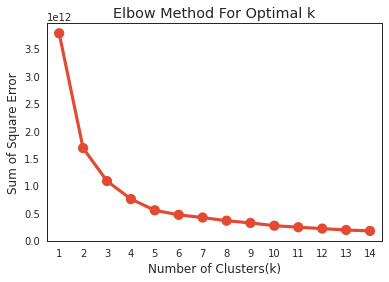

In [416]:
#visualising by elbow method
sse = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sse[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Error')
plt.title('Elbow Method For Optimal k')
plt.show()

In [417]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         427 non-null    int64  
 1   amount                          427 non-null    int64  
 2   emi_duration                    427 non-null    int64  
 3   interest                        427 non-null    int64  
 4   balance_principal               427 non-null    float64
 5   billing_to_due_date_diff        427 non-null    int64  
 6   due_to_settled_date_diff        427 non-null    float64
 7   entity_type_bill                427 non-null    uint8  
 8   entity_type_buy_gold            427 non-null    uint8  
 9   entity_type_cashback            427 non-null    uint8  
 10  entity_type_convenience_fee     427 non-null    uint8  
 11  entity_type_dnd_fee             427 non-null    uint8  
 12  entity_type_emi                 427 

In [418]:
# Instantiate the KMeans models
#
km = KMeans(n_clusters=3, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(X)
#
# Calculate Silhoutte Score
#
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.524


###***Merging dataframe after clustering***

In [419]:
cl_dict = dict(zip(df2.user_id, df2.Clusters))

In [420]:
df_w["Clusters"] = df["user_id"].map(cl_dict)

In [421]:
df_w.head()

,user_id,CIBIL_OVERDUE_Delivered,CIBIL_OVERDUE_Operator_Failed,ISSUE_RESOLVED_Delivered,ISSUE_RESOLVED_Operator_Failed,OTP_Delivered,OTP_Operator_Failed,OVERDUE_SETTLEMENT_Delivered,OVERDUE_SETTLEMENT_Operator_Failed,PAYMENT_LINK_Delivered,PAYMENT_LINK_Operator_Failed,REFERENCE_Delivered,REFERENCE_Operator_Failed,SETTLEMENT_Delivered,SETTLEMENT_Operator_Failed,SUCESSFULLY_Delivered_msgs,Undelivered_msgs,amount,entity_type,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,Clusters
0,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-1000,utility,0,0,0.000000,18,-18.000000,2
1,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-90000,qr,0,0,0.000000,18,-18.000000,2
2,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,91000,bill,0,0,-3571.428571,0,-6.185185,2
3,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-1000,utility,0,0,0.000000,16,-18.000000,2
4,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,1000,bill,0,0,-3571.428571,0,-6.185185,2


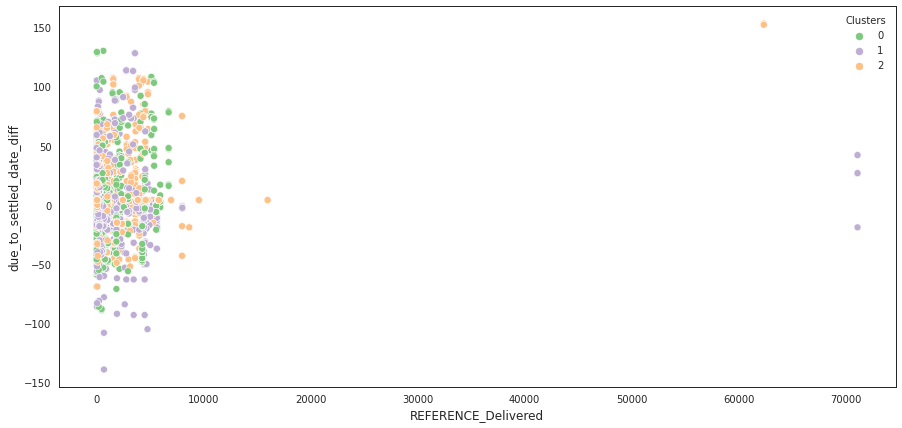

In [422]:
plt.subplots(figsize=(15,7))
sns.scatterplot(x="REFERENCE_Delivered", y="due_to_settled_date_diff", hue="Clusters", data=df_w,palette='Accent');

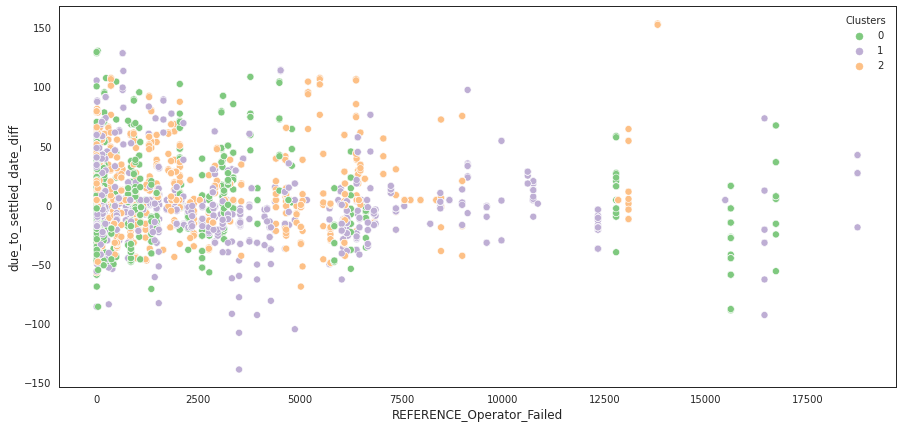

In [423]:
plt.subplots(figsize=(15,7))
sns.scatterplot(x="REFERENCE_Operator_Failed", y="due_to_settled_date_diff", hue="Clusters", data=df_w,palette='Accent');

#***Selecting clusters for analysis***

In [424]:
c0=df2.loc[df2['Clusters'] == 0]

In [425]:
c0.head()

,user_id,amount,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,entity_type_bill,entity_type_buy_gold,entity_type_cashback,entity_type_convenience_fee,entity_type_dnd_fee,entity_type_emi,entity_type_emi_processing_fee,entity_type_giftcard,entity_type_late_fee,entity_type_qr,entity_type_sell_gold,entity_type_shopping,entity_type_utility,Clusters
18,330900,-96016,12,-35190,-118751.250000,881,138.703704,7,0,0,4,0,8,3,2,4,5,0,0,2,0
26,346870,-103663,9,-22934,0.000000,447,329.437500,4,0,1,0,0,6,3,0,4,3,0,0,0,0
31,379813,-160170,6,-27805,-144278.315789,443,1630.750000,2,0,0,3,1,5,1,0,4,4,0,0,2,0
35,424799,-184817,9,-25231,-84000.000000,307,274.909091,5,0,0,0,1,6,2,0,2,0,0,0,2,0
43,440452,-354026,21,-39504,-126818.900000,1023,-657.000000,7,2,0,0,1,14,6,2,2,3,1,0,1,0


In [426]:
c0.shape

(63, 21)

In [427]:
c0.describe()

,user_id,amount,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,entity_type_bill,entity_type_buy_gold,entity_type_cashback,entity_type_convenience_fee,entity_type_dnd_fee,entity_type_emi,entity_type_emi_processing_fee,entity_type_giftcard,entity_type_late_fee,entity_type_qr,entity_type_sell_gold,entity_type_shopping,entity_type_utility,Clusters
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0,63.000000,63.0
mean,443517.095238,-165005.888889,10.619048,-24484.285714,-93616.096034,577.365079,95.819892,3.825397,0.380952,0.031746,2.095238,0.47619,7.142857,2.761905,0.650794,2.269841,3.301587,0.158730,0.0,2.904762,0.0
std,21698.858059,61430.336773,4.025838,8291.254496,73525.603921,346.926752,751.364454,3.718045,0.831411,0.176731,3.613212,0.87726,2.917451,1.200998,1.471873,1.450321,4.361248,0.482144,0.0,2.763321,0.0
min,330900.000000,-354026.000000,6.000000,-54302.000000,-302095.000000,210.000000,-2335.941176,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,444841.500000,-200278.500000,9.000000,-28463.000000,-138633.210526,324.000000,-160.350000,2.000000,0.000000,0.000000,0.000000,0.00000,5.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.0
50%,447878.000000,-169776.000000,9.000000,-23386.000000,-90666.666667,451.000000,76.000000,3.000000,0.000000,0.000000,0.000000,0.00000,6.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.0,2.000000,0.0
75%,451596.000000,-115633.000000,12.000000,-18464.500000,-35534.959514,723.000000,441.740385,5.000000,0.000000,0.000000,3.000000,1.00000,9.000000,3.000000,0.000000,3.000000,4.000000,0.000000,0.0,4.000000,0.0
max,456867.000000,-65815.000000,24.000000,-9000.000000,0.000000,1914.000000,1748.000000,24.000000,4.000000,1.000000,19.000000,3.00000,16.000000,6.000000,5.000000,5.000000,23.000000,3.000000,0.0,11.000000,0.0


In [428]:
c1=df2.loc[df2['Clusters'] == 1]

In [429]:
c1.head()

,user_id,amount,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,entity_type_bill,entity_type_buy_gold,entity_type_cashback,entity_type_convenience_fee,entity_type_dnd_fee,entity_type_emi,entity_type_emi_processing_fee,entity_type_giftcard,entity_type_late_fee,entity_type_qr,entity_type_sell_gold,entity_type_shopping,entity_type_utility,Clusters
2,311410,2917,0,-2916,0.000000,40,13.333333,1,2,1,0,0,0,0,0,1,0,0,0,0,1
3,317539,100,0,0,-3408.762816,0,4.047687,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,318843,2200,0,0,-3408.762816,0,4.047687,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,319100,30470,0,0,0.000000,138,-14.000000,3,0,0,2,0,0,0,0,0,2,0,0,0,1
6,319195,-96030,6,0,0.000000,96,-21.000000,1,0,0,1,0,1,1,1,0,2,0,0,0,1


In [430]:
c1.describe()

,user_id,amount,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,entity_type_bill,entity_type_buy_gold,entity_type_cashback,entity_type_convenience_fee,entity_type_dnd_fee,entity_type_emi,entity_type_emi_processing_fee,entity_type_giftcard,entity_type_late_fee,entity_type_qr,entity_type_sell_gold,entity_type_shopping,entity_type_utility,Clusters
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.0
mean,437349.850467,-34576.794393,0.813084,-2991.658879,-7986.526263,171.658879,-19.050750,2.228972,0.172897,0.037383,1.317757,0.088785,0.453271,0.214953,0.242991,0.490654,1.425234,0.070093,0.009346,1.331776,1.0
std,36478.311477,52333.606242,1.931361,3734.366710,21935.274876,225.579547,204.357751,3.679521,0.487413,0.190144,2.564101,0.316325,1.111258,0.485045,0.785325,0.703717,2.571333,0.255903,0.096446,2.294558,0.0
min,311410.000000,-200000.000000,0.000000,-14222.000000,-163620.615175,0.000000,-765.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,443388.250000,-94593.750000,0.000000,-5323.250000,-3408.762816,23.000000,-92.892857,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,447787.500000,-8201.500000,0.000000,-649.500000,0.000000,102.000000,-2.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
75%,451290.250000,345.750000,0.000000,0.000000,0.000000,216.500000,24.971531,3.000000,0.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.0
max,562508.000000,123179.000000,12.000000,0.000000,0.000000,1512.000000,720.000000,48.000000,3.000000,1.000000,16.000000,2.000000,6.000000,2.000000,6.000000,3.000000,16.000000,1.000000,1.000000,15.000000,1.0


In [431]:
c2=df2.loc[df2['Clusters'] == 2]

In [432]:
c2.head()

,user_id,amount,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,entity_type_bill,entity_type_buy_gold,entity_type_cashback,entity_type_convenience_fee,entity_type_dnd_fee,entity_type_emi,entity_type_emi_processing_fee,entity_type_giftcard,entity_type_late_fee,entity_type_qr,entity_type_sell_gold,entity_type_shopping,entity_type_utility,Clusters
0,132894,-100000,0,-7100,-125000.000000,921,-216.481481,7,1,0,4,0,0,0,16,0,4,0,0,3,2
1,170951,-109480,0,-10778,-106377.428571,159,74.250000,2,0,0,1,0,0,0,0,1,1,0,0,4,2
8,320424,7810,0,-13315,-108072.000000,109,270.000000,2,0,0,0,0,0,0,3,1,0,0,0,0,2
9,321711,-191626,0,-28876,-241744.000000,153,32.381499,1,0,0,0,0,0,0,0,1,0,0,0,6,2
14,326350,-145706,3,-37383,0.000000,133,496.250000,1,1,0,0,0,3,1,0,3,0,1,0,0,2


In [433]:
c2.describe()

,user_id,amount,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,entity_type_bill,entity_type_buy_gold,entity_type_cashback,entity_type_convenience_fee,entity_type_dnd_fee,entity_type_emi,entity_type_emi_processing_fee,entity_type_giftcard,entity_type_late_fee,entity_type_qr,entity_type_sell_gold,entity_type_shopping,entity_type_utility,Clusters
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0
mean,438053.920000,-101687.253333,2.020000,-15468.740000,-73570.621140,295.393333,134.513399,2.253333,0.473333,0.046667,1.953333,0.273333,1.433333,0.553333,0.620000,1.873333,2.166667,0.200000,0.006667,2.153333,2.0
std,40682.650006,49908.527947,2.318499,6707.416839,62442.195323,268.638598,328.687533,2.926818,0.808484,0.267644,3.482144,1.134550,1.704383,0.618904,1.837966,1.070010,3.509176,0.463428,0.081650,2.996053,0.0
min,132894.000000,-320005.000000,0.000000,-43595.000000,-241744.000000,-6.000000,-1465.655172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,442027.500000,-114755.000000,0.000000,-20078.500000,-118829.681818,117.250000,16.190750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,446236.000000,-104098.500000,0.000000,-13908.500000,-78978.928571,211.000000,58.333812,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,2.0
75%,449695.750000,-78018.750000,3.000000,-11247.250000,0.000000,342.750000,311.000000,3.000000,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000,0.000000,3.000000,3.000000,0.000000,0.000000,3.000000,2.0
max,457493.000000,13995.000000,6.000000,-4325.000000,0.000000,1802.000000,1220.000000,20.000000,4.000000,2.000000,24.000000,12.000000,6.000000,2.000000,16.000000,6.000000,24.000000,3.000000,1.000000,18.000000,2.0


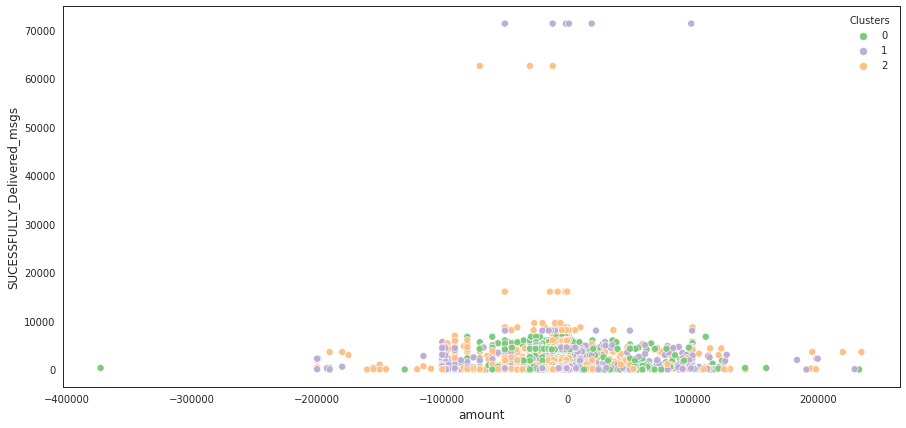

In [434]:
plt.subplots(figsize=(15,7))
sns.scatterplot(x="amount", y="SUCESSFULLY_Delivered_msgs", hue="Clusters", data=df_w,palette='Accent');

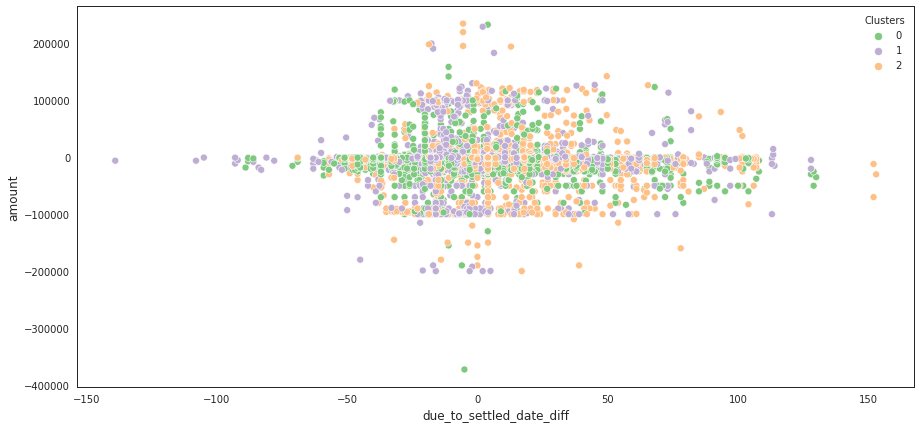

In [435]:
plt.subplots(figsize=(15,7))
sns.scatterplot( x="due_to_settled_date_diff",y="amount", hue="Clusters", data=df_w,palette='Accent');

In [436]:
df2.describe()

,user_id,amount,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,entity_type_bill,entity_type_buy_gold,entity_type_cashback,entity_type_convenience_fee,entity_type_dnd_fee,entity_type_emi,entity_type_emi_processing_fee,entity_type_giftcard,entity_type_late_fee,entity_type_qr,entity_type_sell_gold,entity_type_shopping,entity_type_utility,Clusters
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,438507.103044,-77395.533958,2.683841,-10545.751756,-43659.306420,274.983607,51.842629,2.473068,0.309133,0.039813,1.655738,0.210773,1.784543,0.709602,0.435597,1.238876,1.962529,0.128806,0.007026,1.852459,1.203747
std,36293.326059,71089.840205,4.162858,9932.040096,60946.569644,295.352558,382.164488,3.477777,0.683807,0.218419,3.089583,0.794687,2.837615,1.102697,1.357451,1.238690,3.287264,0.381237,0.083623,2.686125,0.677045
min,132894.000000,-354026.000000,0.000000,-54302.000000,-302095.000000,-6.000000,-2335.941176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,443076.000000,-111745.000000,0.000000,-16331.000000,-92061.833333,80.000000,-74.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,447250.000000,-89403.000000,0.000000,-8904.000000,-3408.762816,187.000000,12.143062,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,450750.000000,-946.500000,4.500000,-649.500000,0.000000,345.500000,199.750000,3.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,2.000000,2.000000
max,562508.000000,123179.000000,24.000000,0.000000,0.000000,1914.000000,1748.000000,48.000000,4.000000,2.000000,24.000000,12.000000,16.000000,6.000000,16.000000,6.000000,24.000000,3.000000,1.000000,18.000000,2.000000


In [437]:
df2.loc[df2['due_to_settled_date_diff'] < -2000]

,user_id,amount,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,entity_type_bill,entity_type_buy_gold,entity_type_cashback,entity_type_convenience_fee,entity_type_dnd_fee,entity_type_emi,entity_type_emi_processing_fee,entity_type_giftcard,entity_type_late_fee,entity_type_qr,entity_type_sell_gold,entity_type_shopping,entity_type_utility,Clusters
402,455979,-140765,18,-18400,-111560.625,1914,-2335.941176,7,0,0,19,0,5,5,0,0,23,0,0,4,0


In [439]:
df_w.head()

,user_id,CIBIL_OVERDUE_Delivered,CIBIL_OVERDUE_Operator_Failed,ISSUE_RESOLVED_Delivered,ISSUE_RESOLVED_Operator_Failed,OTP_Delivered,OTP_Operator_Failed,OVERDUE_SETTLEMENT_Delivered,OVERDUE_SETTLEMENT_Operator_Failed,PAYMENT_LINK_Delivered,PAYMENT_LINK_Operator_Failed,REFERENCE_Delivered,REFERENCE_Operator_Failed,SETTLEMENT_Delivered,SETTLEMENT_Operator_Failed,SUCESSFULLY_Delivered_msgs,Undelivered_msgs,amount,entity_type,emi_duration,interest,balance_principal,billing_to_due_date_diff,due_to_settled_date_diff,Clusters
0,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-1000,utility,0,0,0.000000,18,-18.000000,2
1,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-90000,qr,0,0,0.000000,18,-18.000000,2
2,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,91000,bill,0,0,-3571.428571,0,-6.185185,2
3,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,-1000,utility,0,0,0.000000,16,-18.000000,2
4,132894,0,0,0,0,6,0,0,0,0,0,26,1025,0,0,32,1025,1000,bill,0,0,-3571.428571,0,-6.185185,2


In [441]:
df_w.shape

(5469, 25)